# graph and graph signal

## graph

- a graph $G = (V, E)$ consists of a set of vertices $V=\left \{ v_0, v_1,\cdots  v_{n-1}\right \}$ and edges $E \in \mathcal{V} \times \mathcal{V} $ that connect them

- a graph can be represented by an **adjacency matrix** $A \in \mathbb{R}^{n \times n}$

    where $A_{i,j}$ is weight of directed edge from node $i$ to node $j$

## data graph: natural graph vs. affinity graph

- natural graph: some data naturally has a graph structure

    e.g., protein interaction, social network, chemical molecule
    

- affinity graph: some data is high dim and we can induce a graph on them

    e.g., like diffusion maps, first calculate pairwise distance matrix of data, then calculate affinity matrix, the affinity matrix is a graph, then we can calculate adjacency matrix from affinity matrix

## graph signal

- graph signals $\mathcal{S}$ is a set of $p$ vectors in $n$ dimension, represent relation between coefficients of vector $\mathbf{s}_i \in \mathbb{R}^{n}$ with a graph $G = (V, A)$

$$
\mathcal{S} = \left\{\mathbf{s}_1, ..., \mathbf{s}_{p} \right\}
$$

- each coefficient $[\mathbf{s}_k]_j$ is indexed by node $v_j$

- $A_{i,j}$ is degree of relation of signal $[\mathbf{s}_k]_i$ on node $i$ to signal $[\mathbf{s}_k]_j$ on node $j$

# graph Laplacian

- regardless of data comes as a natural graph or affinity graph,

    we can use graph Laplacian to transform the data

- graph Laplacian is a difference operator $L$ based on adjacency matrix A


Type of graph Laplacian

- unnormalized (plain)

$$
L=D-A
$$

- normalized: measures how similar a node to its neighbors

$$
L=I-D^{-1/2}AD^{-1/2}
$$   

- random walk: 

    $M$ is Markov transition matrix in diffusion map

$$
L=I-D^{-1}A=I-M
$$

$M$ and $L$ have same eigenvectors except that the order is flipped,

eigenvalues of $L$ are $1-\lambda_M$


- $D$ is degree matrix: a diagonal matrix

    diagonal entry $D_{ii}$ is row sum of adjacency matrix A corresponds to degree of each node 
   
    $$
    D_{ii}=\sum_j A_{ij}
    $$

## 2nd derivative operator

- **2nd derivative** measures the instantaneous rate of change of the first derivative,

    i.e., the rate of change of the rate of change of the original function

- The sign of 2nd derivative tells us whether the slope of the tangent line to f is increasing or decreasing

- graph Laplacian is a 2nd derivative operator


- the **discrete** ring graph here describes what Graph Laplacian does in ideal condition


- suppose we have a feature $X \in \mathbb{R}^{7}$, $X_i$ is signal value of node i


- 1st derivative: measures difference between **signal values of connected nodes**

$$
d_i = X_i - X_{i-1}
$$

$$
d_{i+1} = X_{i+1} - X_{i}
$$

- 2nd derivative: measures difference between **differences**

$$
A-D=d_{i+1} - d_{i} = (X_{i+1} - X_{i}) - (X_i - X_{i-1}) = {\color{Red} {-2}} X_{i} + X_{i-1} + X_{i+1} 
$$

here 2 is degree of ith node in degree matrix


## Graph Laplacian matrix is a negative 2nd derivative operator

for a directed ring graph with 7 nodes, 

- adjacency matrix $A \in \mathbb{R}^{7 \times 7}$ is

$$
A=\begin{bmatrix}
0 & {\color{Red} 1} & 0 &  0& 0 & 0 & {\color{Red} 1}\\ 
{\color{Red} 1} &  0& {\color{Red} 1} & 0 & 0 & 0 &0 \\ 
0 & {\color{Red} 1} &  0& {\color{Red} 1} & 0 &0  &0 \\ 
0 & 0 & {\color{Red} 1} &  0& {\color{Red} 1} & 0 & 0\\ 
0 & 0 & 0 & {\color{Red} 1} &  0& {\color{Red} 1} & 0\\ 
0 & 0 & 0 & 0 & {\color{Red} 1} &  0& {\color{Red} 1}\\ 
{\color{Red} 1} &0  & 0 & 0 & 0 & {\color{Red} 1} & 0
\end{bmatrix}
$$

- degree matrix $D \in \mathbb{R}^{7 \times 7}$: diagonal entries are all 2s which is row sum of adjacent matrix A

$$
D=\begin{bmatrix}
{\color{Red} 2} & 0 & 0 &  0& 0 & 0 & 0\\ 
0 &  {\color{Red} 2}& 0 & 0 & 0 & 0 &0 \\ 
0 & 0 &  {\color{Red} 2} & 0 & 0 &0  &0 \\ 
0 & 0 & 0 &  {\color{Red} 2}& 0 & 0 & 0\\ 
0 & 0 & 0 & 0 &  {\color{Red} 2}& 0 & 0\\ 
0 & 0 & 0 & 0 & 0 &  {\color{Red} 2}& 0\\ 
0 &0  & 0 & 0 & 0 & 0 & {\color{Red} 2}
\end{bmatrix}
$$

- 2nd derivative operator $A-D \in \mathbb{R}^{7 \times 7}$: 

$$
A-D=\begin{bmatrix}
{\color{Red} {-2}} & {\color{Red} {\color{Red} {1}}} & 0 &  0& 0 & 0 & {\color{Red} {1}}\\ 
{\color{Red} {1}} &  {\color{Red} {-2}}& {\color{Red} {1}} & 0 & 0 & 0 &0 \\ 
0 & {\color{Red} {1}} &  {\color{Red} {-2}} & {\color{Red} {1}} & 0 &0  &0 \\ 
0 & 0 & {\color{Red} {1}} &  {\color{Red} {-2}}& {\color{Red} {1}} & 0 & 0\\ 
0 & 0 & 0 & {\color{Red} {1}} &  {\color{Red} {-2}}& {\color{Red} {1}} & 0\\ 
0 & 0 & 0 & 0 & {\color{Red} {1}} &  {\color{Red} {-2}}& {\color{Red} {1}}\\ 
{\color{Red} {1}} &0  & 0 & 0 & 0 & {\color{Red} {1}} & {\color{Red} {-2}}
\end{bmatrix}
$$

- unnormalized Graph Laplacian $L=D-A \in \mathbb{R}^{7 \times 7}$: 

$$
L=\begin{bmatrix}
{\color{Red} 2} & {\color{Red} {\color{Red} {-1}}} & 0 &  0& 0 & 0 & {\color{Red} {-1}}\\ 
{\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0 & 0 & 0 &0 \\ 
0 & {\color{Red} {-1}} &  {\color{Red} 2} & {\color{Red} {-1}} & 0 &0  &0 \\ 
0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0 & 0\\ 
0 & 0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0\\ 
0 & 0 & 0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}}\\ 
{\color{Red} {-1}} &0  & 0 & 0 & 0 & {\color{Red} {-1}} & {\color{Red} 2}
\end{bmatrix}
$$

## Laplacian quadratic form measures graph signal smoothness

- Laplacian quadratic form $s \in \mathbb{R}$ measures graph signal smoothness:
    
    for feature $X \in \mathbb{R}^{7}$

$$
s=X^T L X
$$


- the lower the s, the smoother the signals, means entries of X are close to each other

$$
\begin{align}
s
&=X^T L X \\[1em]
&=\begin{bmatrix}
X_1 & X_2 & X_3 & X_4 & X_5 & X_6 & X_7
\end{bmatrix}
\begin{bmatrix}
{\color{Red} 2} & {\color{Red} {\color{Red} {-1}}} & 0 &  0& 0 & 0 & {\color{Red} {-1}}\\ 
{\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0 & 0 & 0 &0 \\ 
0 & {\color{Red} {-1}} &  {\color{Red} 2} & {\color{Red} {-1}} & 0 &0  &0 \\ 
0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0 & 0\\ 
0 & 0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}} & 0\\ 
0 & 0 & 0 & 0 & {\color{Red} {-1}} &  {\color{Red} 2}& {\color{Red} {-1}}\\ 
{\color{Red} {-1}} &0  & 0 & 0 & 0 & {\color{Red} {-1}} & {\color{Red} 2}
\end{bmatrix}
\begin{bmatrix}
X_1\\ 
X_2\\ 
X_3\\ 
X_4\\ 
X_5\\ 
X_6\\ 
X_7
\end{bmatrix}
\\[1em]
&=\begin{bmatrix}
(2X_1-X_2-X_7) & (2X_2-X_1-X_3) & (2X_3-X_2-X_4) & (2X_4-X_3-X_5) & (2X_5-X_4-X_6) & (2X_6-X_5-X_7) & (2X_7-X6-X_1)
\end{bmatrix}
\begin{bmatrix}
X_1\\ 
X_2\\ 
X_3\\ 
X_4\\ 
X_5\\ 
X_6\\ 
X_7
\end{bmatrix}

\\[1em]
&=2(X_1^2+X_2^2+...+X_7^2)-2(X_1 X_2 + X_2 X_3 +...+ X_6 X_7 + X_7 X_1)
\end{align}
$$

thus, if signals are very smooth such that $X_1=X_2=X_3=...=X_7$, $s=0$

### Laplacian measures curvature of signals

- curvature 曲率: measures how much a curve's direction changes over a small distance travelled, e.g., angle


- if connected vertex have similar values of signal, average of neighbors is itself


- if connected vertex have different values of signal, average of neighbors is not on the curve

## Laplacian eigenvectors are frequency harmonics

- for continuous function (signal) $y$: 2nd derivative of $y$ is a **scaled** version of y

$$
\frac{\partial^2 y}{\partial x^2}=\lambda y
$$

e.g., for sine function $y=\sin(\omega x)$ or cosine function,

1st derivative $\frac{\partial y}{\partial x}=\omega \cos(\omega x)$

2nd derivative $\frac{\partial^2 y}{\partial x^2}=-\omega ^2 \sin(\omega x)=-\omega ^2 y$

$$
\Rightarrow \lambda = -\omega ^2 
$$

- for discrete function (signal) y: 2nd derivative is a negative Graph Laplacian Matrix L
    
    - eigendecompose L: $L=U \Lambda U^{-1}$
    
    - eigenvectors of L $\left \{ u_1, u_2,...,u_7 \right \}$ are spectrum of Fourier harmonics 频率谐波
    
    - eigenvalues of L $\left \{ \lambda_1, \lambda_2,...,\lambda_7 \right \}$ are similar to scalar above $\lambda=-\omega ^2$

- $U \in \mathbb{R}^{7 \times 7}$ contains 7 eigenvectors of $L$, each row corresponds to a vertex in $X$

$$
U=\begin{bmatrix}
| & | &  & |\\ 
u_1 & u_2 & \cdots  & u_7\\ 
| & | &  & |
\end{bmatrix}
$$

### plot Laplacian eigenvectors on a line graph

- eigenfunction $f$: a function $f$ is an eigenfunction of D if satisfy the equation:
       
    $$
    Df=\lambda f
    $$
    
     where D is a linear operator defined on a function space,
     
     $\lambda$ is a scalar called eigenvalue, $f$ is actually an eigenvector of D

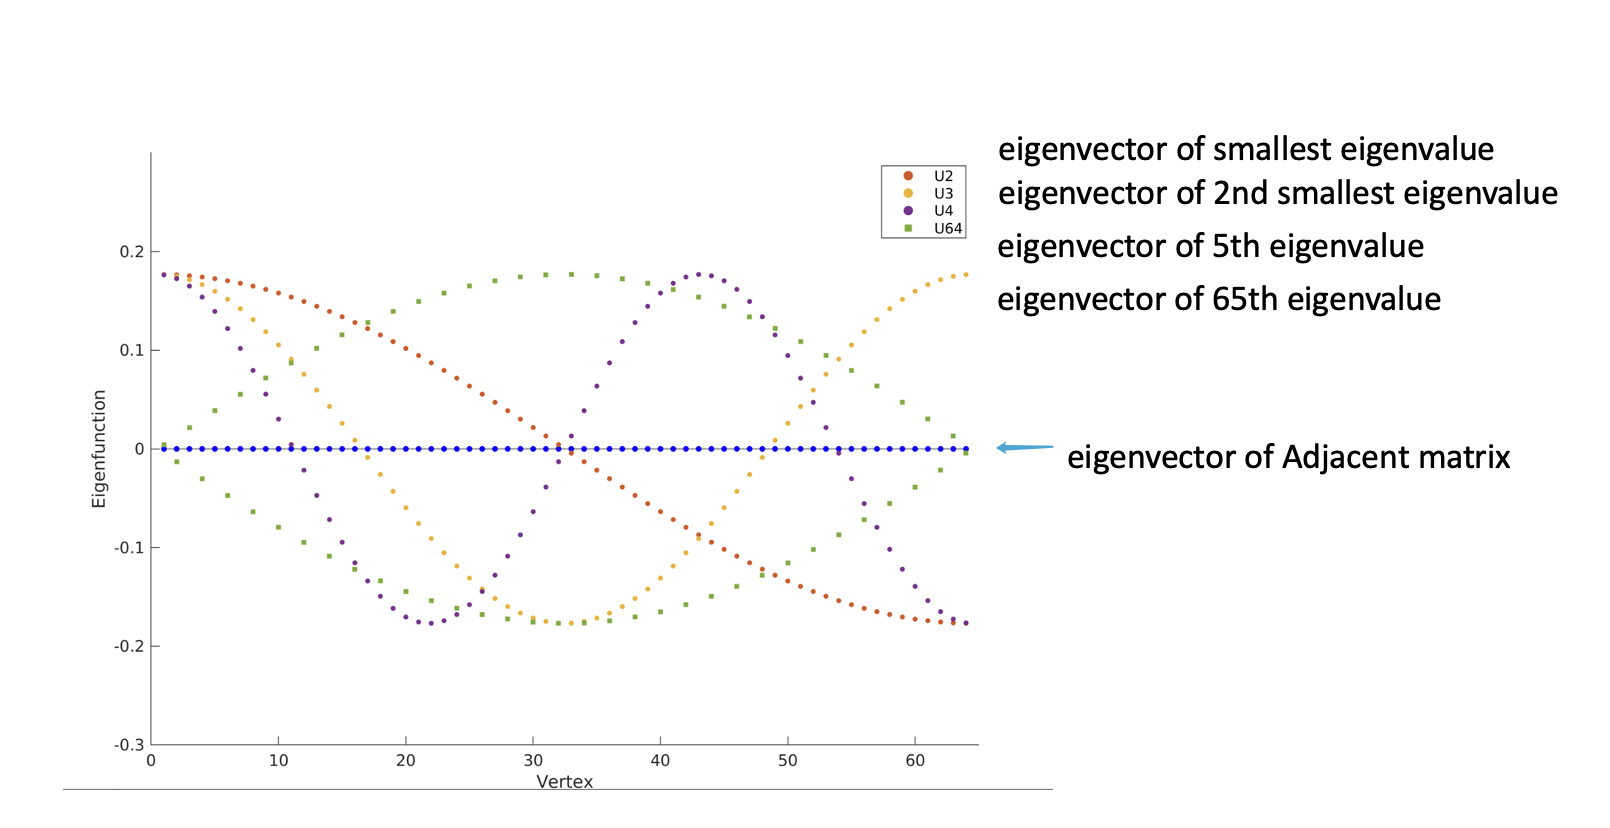

- on the line graph, y-axis is value in eigenvector, x-axis is vertex index
    
    - $u_2$: eigenvector of smallest eigenvalue: low frequency
    
    - $u_3$: eigenvector of 2nd smallest eigenvalue: medium frequency
    
    - $u_{64}$: eigenvector of smallest eigenvalue: very high frequency, function oscillates a lot
    
    - blue straight dash line: eigenvector of adjacency matrix, each entries are 0s

    

### plot Laplacian eigenvectors on a grid graph

- grid graph is another idealistic graph to visualize eigenvectors of Graph Laplacian matrix


- eigenvectors of Graph Laplacian matrix define a signal goes from low freq (true signal) to high freq (noise)

    - 2nd lowest eigenvector: low freq
    
    - 10th lowest eigenvector: medium freq
    
    - 2nd highest eigenvector: high freq

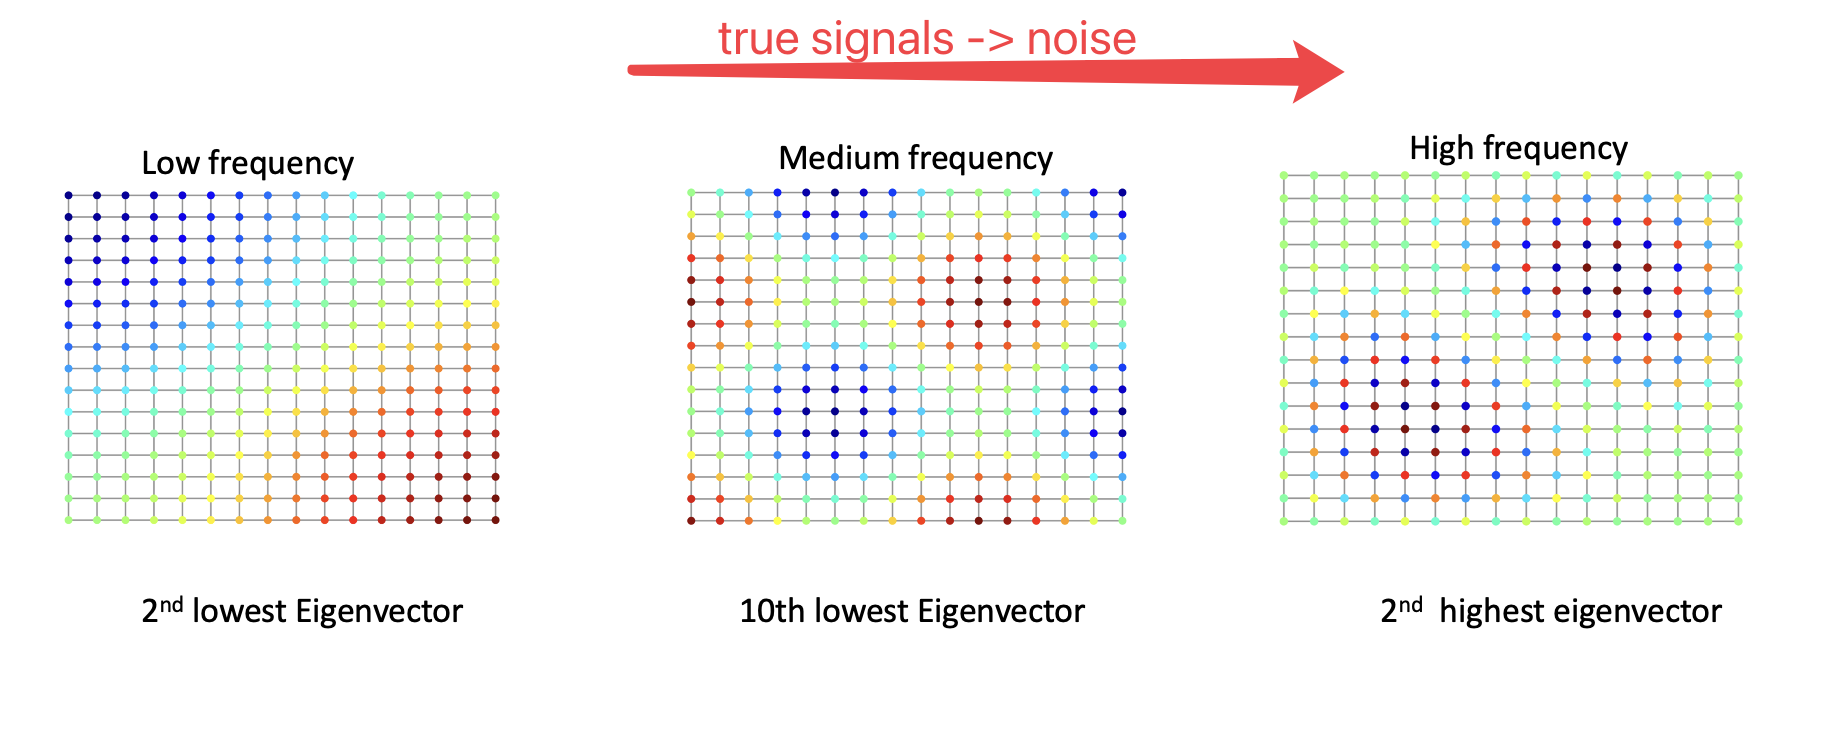

# graph Fourier transform (GFT)

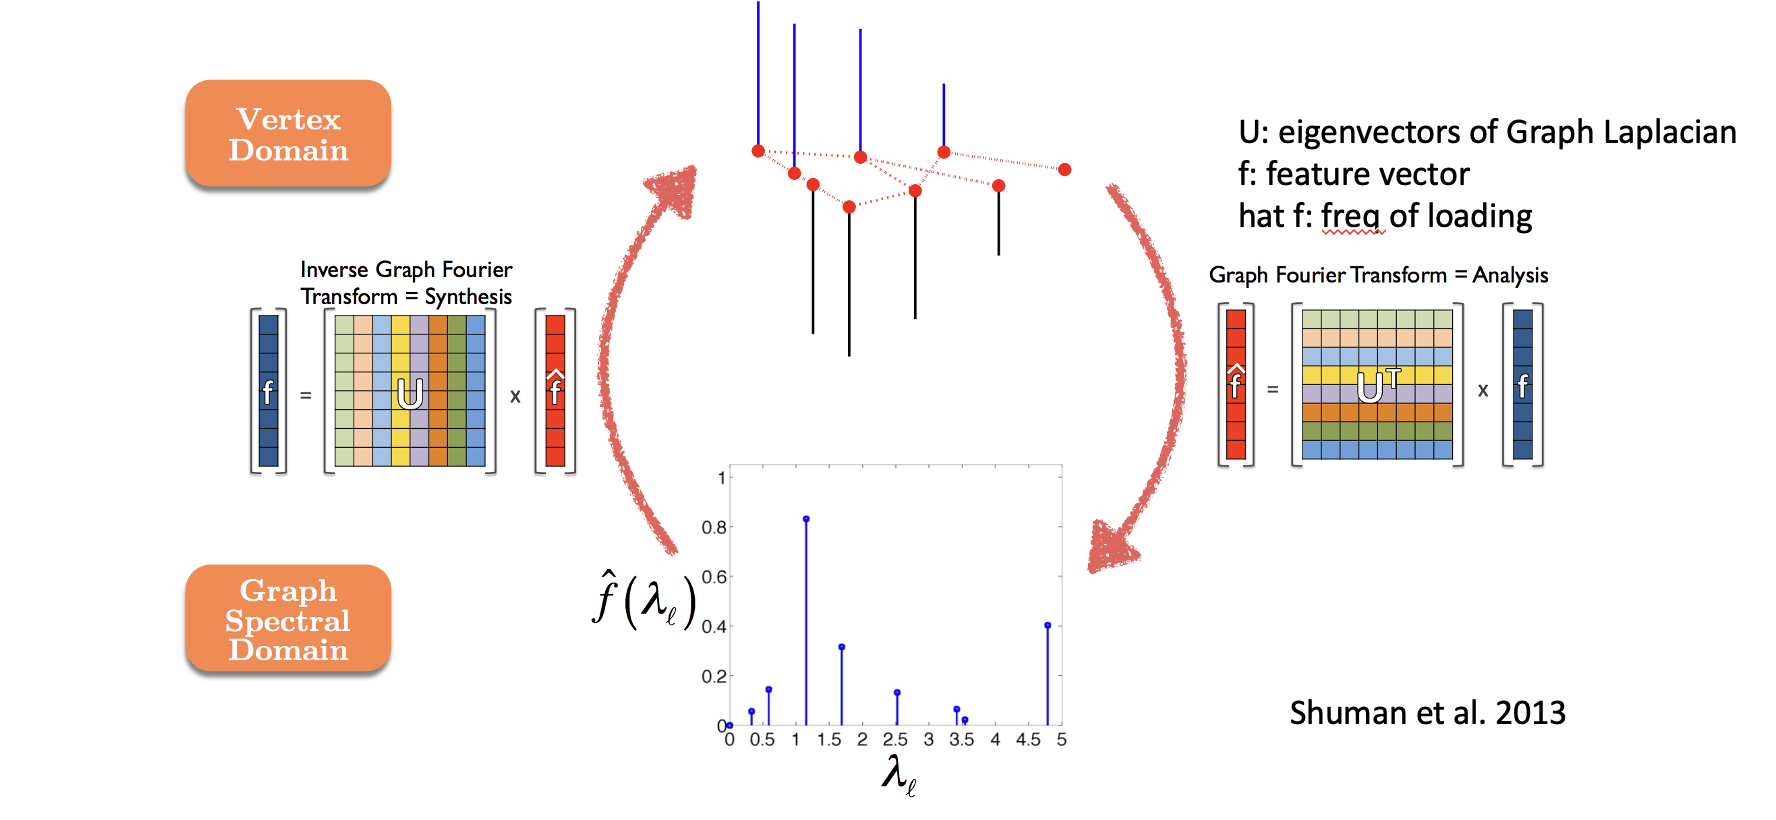

- graph can represent any types of data, features are signals on graph

- function of Graph Fourier Transform is similar to function of Fourier Transform in signal processing, we can translate operations in signal processing to graph.

- use Graph Fourier Transform (GFT) and Inverse Graph Fourier Transform (IGFT) to transform features between **vertex domain and graph spectral domain (freq domain)**

- Graph Fourier transform

    $\hat f \in \mathbb{R}^{n}$ is a feature vector in Graph spectral domain

$$
\hat f = U^T f
$$

where $U \in \mathbb{R}^{n \times n}$ is orthonormal matrix contains eigenvectors of Graph Laplacian matrix

$f \in \mathbb{R}^{n}$ is a feature vector in vertex domain, n is number of vertex in the graph

$$
\hat f = U^T f= \begin{bmatrix}
- & u_1 & - \\ 
- & u_2 & - \\ 
 & \vdots  & \\ 
- & u_n & - 
\end{bmatrix}
\begin{bmatrix}
X_1\\ 
X_2\\ 
\vdots \\ 
X_n
\end{bmatrix}
=
\begin{bmatrix}
u_{1(1)}X_1+u_{1(2)}X_2+...u_{1(n)}X_n\\ 
u_{2(1)}X_1+u_{2(2)}X_2+...u_{2(n)}X_n\\ 
\vdots \\ 
u_{n(1)}X_1+u_{n(2)}X_2+...u_{n(n)}X_n
\end{bmatrix}
$$

the ith entry of $\hat f$ is a linear combination of signal value in each vertex:

$$\hat f_i = u_{i(1)}X_1+u_{i(2)}X_2+...u_{i(n)}X_n$$

- inverse Graph Fourier transform: go back to original graph

$$
f = U \hat f
$$

# regular vs. graph signal processing

|                  |     Regular  signal processing                                                                       |     Graph                                                                                                      |
|------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
|      Similar     |     Signals are observations                                                                         |     Signals are features of data points                                                                        |
|                  |     Signals   over time (continuous axis)     e.g. audio, radio                                      |     Signals   over a graph (discrete point set)                                                                |
|                  |     Signals is decomposed into sine/cosine                                                           |     Signals is decomposed into eigenvector basis of graph Laplacian matrix                                     |
|                  |     Filter is a modification of Fourier coefficients over   sine/cosines of different frequencies    |     Filter is a modification of Graph Fourier coefficients over   eigenvectors of different frequencies        |
|     Different    |     Clean notion of translation                                                                      |     Less clean notion of translation      Hard to interpret what means to translate regular/irregular graph    |

- a regular graph: each vertex has the same number of neighbors; 
i.e. every vertex has the same degree or valency


# graph filtering

## step

2 types of graph filtering 

- natural graph: adjacency matrix A -> Graph Laplacian matrix L -> eigendecompose L -> modulate eigenvalues -> apply L' to feature X  $X'=U H(\Lambda) U^{-1} X$

- affinity graph: data $X$ -> distance matrix -> affinity matrix A -> Markov matrix M -> powered Markov matrix $M^t$ -> filtered signal $X'=M^t X$

    lowpass filter $F_t$ -> filtered signal $X' = IGFT(F_t \cdot GFT(X))$

Recovering Gene Interactions from Single-Cell Data Using Data Diffusion

https://pubmed.ncbi.nlm.nih.gov/29961576/

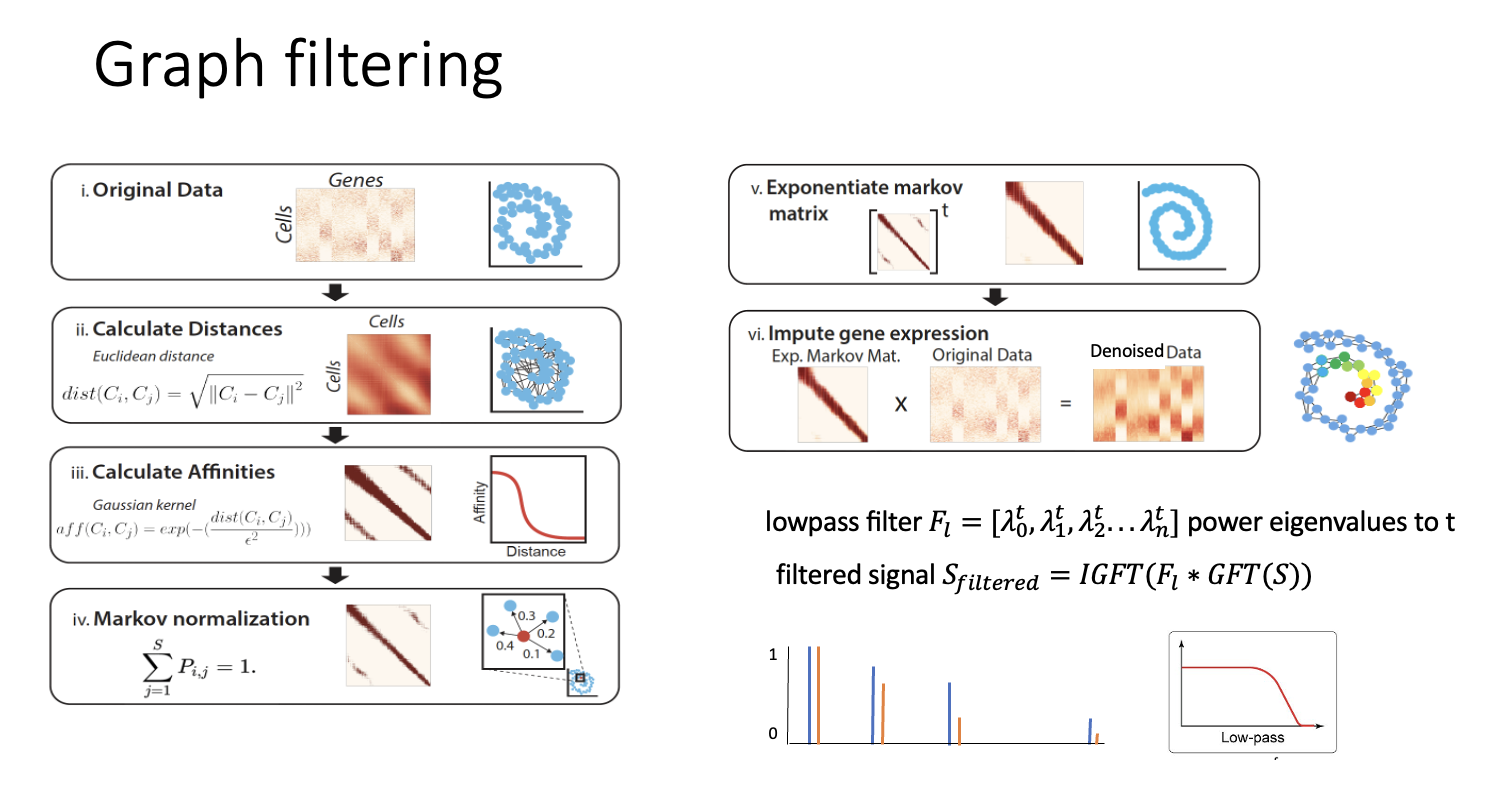

## graph filtering vs. PCA denoising

- graph filtering: take off eigenvectors with high eigenvalues bc signals are low frequency while noises are high frequency

- PCA denoising: take off eigenvectors with low eigenvalue bc signals have high variance while noises have low variance

## filter construction

- eigendecompose Graph Laplacian

$$
L = U\Lambda U^{-1}
$$

- modulate and alter eigenvalues

$$
L = U H(\Lambda) U^{-1}
$$

$$
H(\Lambda)=\begin{bmatrix}
H(\lambda_1) &  &  & \\ 
 & H(\lambda_2) &  & \\ 
 &  & \ddots  & \\ 
 &  &  & H(\lambda_n)
\end{bmatrix}
$$

e.g., $H(\lambda)=e^{-\lambda}$, a low pass filter, diminish high frequency components

- Apply graph laplacian to signal

$$
U H(\Lambda) U^{-1} X
$$



In [ ]:
Take the dataset you created for diffusion, and compute a Laplacian 
Visualize the eigenvectors 
Do the same for the swiss roll 
